In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits

from ekfplot import plot as ek
from ekfplot import colors as ec

In [14]:
agn = pd.read_parquet('../local_data/inputs/agnqso_desi_merianmatched.parquet')
agn = agn.rename({'coord_ra_Merian':'RA','coord_dec_Merian':"DEC"},axis=1)

In [15]:
dwarf_agn = agn.query ('logmass_zcorrected < 9.')

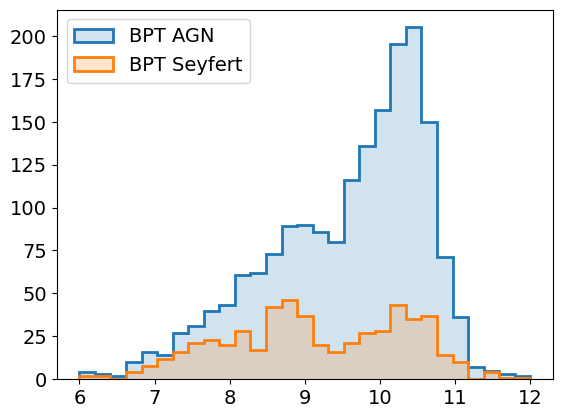

In [17]:
mbins = np.linspace(6., 12., 30)
ek.hist(agn.query('is_bpt_agn')['logmass_zcorrected'],  bins=mbins, alpha=0.2, lw=2, label='BPT AGN')
ek.hist(agn.query('is_bpt_seyfert')['logmass_zcorrected'], bins=mbins, alpha=0.2, lw=2, label='BPT Seyfert')
#ek.hist(agn.query('is_heii_agn')['logmass_zcorrected'], bins=mbins, alpha=0.2, lw=2, label='HeII')
#ek.hist(agn.query('is_nev_agn')['logmass_zcorrected'],  bins=mbins, alpha=0.2, lw=2, label='NeV')
plt.legend()

In [32]:
agn.query('is_bpt_seyfert&(logmass_zcorrected<9.3)')[['RA','DEC']].to_csv('../../pixel_excess/scripts/desi_agn.txt', index=False, header=False, sep=' ')

In [31]:
agn.query('is_bpt_seyfert&(logmass_zcorrected<9.3)').shape

(298, 110)

In [22]:
from astropy import units as u
from astropy import cosmology
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

In [28]:
(84.*u.arcsec/(0.168))

<Quantity 500. arcsec>

In [27]:
(30.*u.kpc / cosmo.kpc_comoving_per_arcmin(0.08) / (0.168*u.arcsec/u.pix)).to(u.pix)

<Quantity 109.50601921 pix>